# Feature engineering

### Data Imputation

In [1]:
import pandas as pd
import numpy as np
import os
data_path=os.path.join("local_data","diamonds_data_imputation.csv")
data=pd.read_csv(data_path)

In [2]:
print(data.head())

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    NaN  3.95  3.98   
1           2   0.21      NaN     E     SI1   59.8   61.0  326.0  3.89  3.84   
2           3   0.23     Good     E     NaN   56.9   65.0  327.0  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0  334.0  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0  335.0  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  


#### Mean impute 

In [3]:
data_mean_imput = data.copy()[["depth", "table", "price","x","y"]]
data_mean_imput=data_mean_imput.fillna(data_mean_imput.mean()) 
data_mean_imput.head()

,depth,table,price,x,y
0,61.5,55.0,3933.062929,3.95,3.98
1,59.8,61.0,326.000000,3.89,3.84
2,56.9,65.0,327.000000,4.05,4.07
3,62.4,58.0,334.000000,4.20,4.23
4,63.3,58.0,335.000000,4.34,4.35


#### Mode impute

In [4]:
data_mode_imput = data.copy()
data_mode_imput=data_mode_imput.fillna(data_mode_imput.mode()) 
data_mode_imput.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,605.0,3.95,3.98,2.43
1,2,0.21,NaN,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,3,0.23,Good,E,NaN,56.9,65.0,327.0,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


#### Median impute

In [5]:
data_median_imput = data.copy()[["depth", "table", "price","x","y"]]
data_median_imput=data_median_imput.fillna(data_median_imput.median()) 
data_median_imput.head()

,depth,table,price,x,y
0,61.5,55.0,2401.0,3.95,3.98
1,59.8,61.0,326.0,3.89,3.84
2,56.9,65.0,327.0,4.05,4.07
3,62.4,58.0,334.0,4.20,4.23
4,63.3,58.0,335.0,4.34,4.35


#### Impute categorial data

In [6]:
def calc_mode(x):
    return x.fillna(x.value_counts().index[0])

In [7]:
# filling with most common class
data_categorial_imput = data.copy()
data_categorial_imput = data_categorial_imput.apply(lambda x: calc_mode(x),axis=1)
#data_categorial_imput = data_categorial_imput.apply(lambda x: x.fillna(x.value_counts().index[0]))
data_categorial_imput.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,1.0,3.95,3.98,2.43
1,2,0.21,2,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,3,0.23,Good,E,3,56.9,65.0,327.0,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [8]:
# setting nan as new "Unknown" class
data_categorial_imput_unknown = data.copy()
data_categorial_imput_unknown = data_categorial_imput_unknown.fillna("Unknown")
data_categorial_imput_unknown.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,Unknown,3.95,3.98,2.43
1,2,0.21,Unknown,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,3,0.23,Good,E,Unknown,56.9,65.0,327.0,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334.0,4.2,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


### Categorial Encoding

#### One-hot-encoding

In [9]:
data_mode_imput.cut

0            Ideal
1              NaN
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: object

In [10]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data_mode_imput, test_size=0.2, random_state=42)

In [11]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit the encoder on the training data
encoder.fit(train_data[['cut']])

# Transform both the training and test data
train_encoded = encoder.transform(train_data[['cut']]).toarray()
test_encoded = encoder.transform(test_data[['cut']]).toarray()

# Convert the encoded arrays to DataFrames
train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(['cut']))
test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(['cut']))

# Print the encoded DataFrames
print(train_encoded_df.head())
print(test_encoded_df.head())

   cut_Fair  cut_Good  cut_Ideal  cut_Premium  cut_Very Good  cut_nan
0       0.0       1.0        0.0          0.0            0.0      0.0
1       0.0       0.0        0.0          0.0            1.0      0.0
2       0.0       0.0        0.0          1.0            0.0      0.0
3       0.0       1.0        0.0          0.0            0.0      0.0
4       0.0       0.0        0.0          0.0            1.0      0.0
   cut_Fair  cut_Good  cut_Ideal  cut_Premium  cut_Very Good  cut_nan
0       0.0       0.0        1.0          0.0            0.0      0.0
1       0.0       0.0        0.0          0.0            1.0      0.0
2       0.0       0.0        1.0          0.0            0.0      0.0
3       0.0       0.0        0.0          1.0            0.0      0.0
4       0.0       0.0        1.0          0.0            0.0      0.0


In [12]:
enc = OneHotEncoder(handle_unknown='ignore')
encoder = enc.fit(train_data[['cut']])

In [13]:
train_tranfrom = enc.transform(train_data[['cut']])

In [14]:
train_tranfrom.toarray()

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [15]:
test_data.fillna('unknown', inplace=True)
pd.get_dummies(test_data.cut)

C:\Users\zvibe\AppData\Local\Temp\ipykernel_24812\242492701.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  test_data.fillna('unknown', inplace=True)


,Fair,Good,Ideal,Premium,Very Good,unknown
1388,False,False,True,False,False,False
50052,False,False,False,False,True,False
41645,False,False,True,False,False,False
42377,False,False,False,True,False,False
17244,False,False,True,False,False,False
...,...,...,...,...,...,...
44081,False,False,False,False,True,False
23713,False,False,False,False,True,False
31375,False,True,False,False,False,False
21772,False,False,True,False,False,False


In [16]:
train_data.cut.unique()

array(['Good', 'Very Good', 'Premium', 'Ideal', 'Fair', nan], dtype=object)

In [17]:
test_data.cut.unique()

array(['Ideal', 'Very Good', 'Premium', 'Fair', 'Good', 'unknown'],
      dtype=object)

In [18]:
one_hot_df=pd.get_dummies(data_mode_imput.cut,prefix='cut')
print(one_hot_df.head())

   cut_Fair  cut_Good  cut_Ideal  cut_Premium  cut_Very Good
0     False     False       True        False          False
1     False     False      False        False          False
2     False      True      False        False          False
3     False     False      False         True          False
4     False      True      False        False          False


In [19]:
data_mode_imput.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [20]:
data_mode_imput_one_hot=pd.concat([data_mode_imput.drop(columns=['cut']),one_hot_df],axis=1)
print(data_mode_imput_one_hot.columns)

Index(['Unnamed: 0', 'carat', 'color', 'clarity', 'depth', 'table', 'price',
       'x', 'y', 'z', 'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium',
       'cut_Very Good'],
      dtype='object')


In [21]:
print(data_mode_imput_one_hot.head())

   Unnamed: 0  carat color clarity  depth  table  price     x     y     z  \
0           1   0.23     E     SI2   61.5   55.0  605.0  3.95  3.98  2.43   
1           2   0.21     E     SI1   59.8   61.0  326.0  3.89  3.84  2.31   
2           3   0.23     E     NaN   56.9   65.0  327.0  4.05  4.07  2.31   
3           4   0.29     I     VS2   62.4   58.0  334.0  4.20  4.23  2.63   
4           5   0.31     J     SI2   63.3   58.0  335.0  4.34  4.35  2.75   

   cut_Fair  cut_Good  cut_Ideal  cut_Premium  cut_Very Good  
0     False     False       True        False          False  
1     False     False      False        False          False  
2     False      True      False        False          False  
3     False     False      False         True          False  
4     False      True      False        False          False  


#### Dummy Variables

In [22]:
dummy_df=pd.get_dummies(train_data.cut, prefix='cut', drop_first=True)
data_mode_imput_dummy=pd.concat([train_data.drop(columns=['cut']),train_data],axis=1)
print(data_mode_imput_dummy.columns)

Index(['Unnamed: 0', 'carat', 'color', 'clarity', 'depth', 'table', 'price',
       'x', 'y', 'z', 'Unnamed: 0', 'carat', 'cut', 'color', 'clarity',
       'depth', 'table', 'price', 'x', 'y', 'z'],
      dtype='object')


In [23]:
dummy_df

,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
26546,True,False,False,False
9159,False,False,False,True
14131,False,False,True,False
15757,True,False,False,False
24632,False,False,False,True
...,...,...,...,...
11284,False,False,False,True
44732,False,True,False,False
38158,False,False,False,True
860,False,False,True,False


In [24]:
one_hot_df

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,False,False,True,False,False
1,False,False,False,False,False
2,False,True,False,False,False
3,False,False,False,True,False
4,False,True,False,False,False
...,...,...,...,...,...
53935,False,False,True,False,False
53936,False,True,False,False,False
53937,False,False,False,False,True
53938,False,False,False,True,False


### Handling Outliers

#### Dropping outlier rows with standard deviation

In [25]:
data_remove_outliers = data.copy()
#set a factor e.g., 3
factor = 3
upper_lim = data_remove_outliers['price'].mean () + data_remove_outliers['price'].std () * factor
lower_lim = data_remove_outliers['price'].mean () - data_remove_outliers['price'].std () * factor

data_remove_outliers = data_remove_outliers[(data_remove_outliers['price'] < upper_lim) & (data['price'] > lower_lim)]
print(data_remove_outliers.shape)

(52728, 11)


### Transformation 

#### Binning

In [26]:
data_binning=data.copy()
print(data_binning.price.head())

0      NaN
1    326.0
2    327.0
3    334.0
4    335.0
Name: price, dtype: float64


In [27]:
def split_x(x):
    return str(x.carat).split('.')[0]

In [28]:
data_binning['carat0']=data_binning.apply(lambda x:split_x(x), axis=1)

In [29]:
data_binning['carat0'].head()

0    0
1    0
2    0
3    0
4    0
Name: carat0, dtype: object

#### pd.qcut 
Quantile-based discretization function.

Tries to divide up the underlying data into equal sized bins. 

In [30]:
categories_labels, bins = pd.qcut(data_binning['carat'], 3,labels=['low','mid','high'], retbins=True)
data_binning['categories_labels']=categories_labels
data_binning['categories_labels'].head()

0    low
1    low
2    low
3    low
4    low
Name: categories_labels, dtype: category
Categories (3, object): ['low' < 'mid' < 'high']

In [31]:
bins

array([0.2 , 0.5 , 1.  , 5.01])

#### Log transformations 

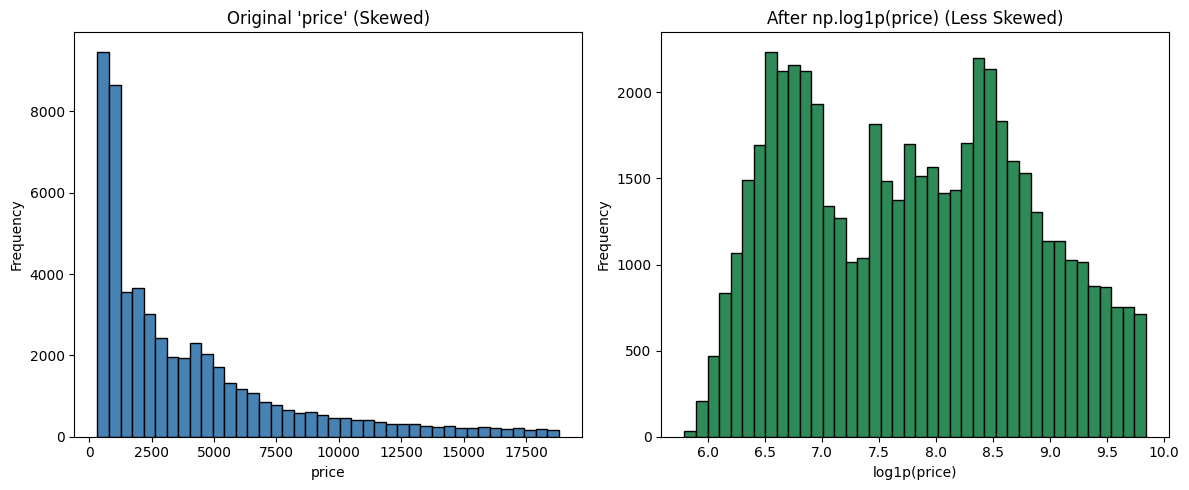

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Drop missing values for price

data_transformation = data["price"].copy().dropna()

# Apply log1p transformation
data_log = np.log1p(data_transformation)

# Plot before/after
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(data_transformation, bins=40, color='steelblue', edgecolor='black')
plt.title("Original 'price' (Skewed)")
plt.xlabel("price")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(data_log, bins=40, color='seagreen', edgecolor='black')
plt.title("After np.log1p(price) (Less Skewed)")
plt.xlabel("log1p(price)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


## Preprocessing Pipeline

In [33]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# --- load public dataset ---
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target

# --- train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- pipeline ---
pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000))
])

# --- fit & evaluate ---
pipe.fit(X_train, y_train)
score = pipe.score(X_test, y_test)

print(f"Accuracy on test set: {score:.3f}")


Accuracy on test set: 0.982


StandardScaler is a preprocessing step from scikit-learn that makes your features more comparable by standardizing them:

z=x−μσ
z=
σ
x−μ
	​


x = original feature value

μ = mean of the feature (calculated from the training set)

σ = standard deviation of the feature (from training set)

Effect

After scaling, each feature will have:

Mean ≈ 0

Standard deviation ≈ 1

This helps many models (like Logistic Regression, SVMs, KNN, Neural Nets) that are sensitive to feature scales.